# Ecometrics and CFA

Sampson and Raudenbush outline a theory of "ecometrics" designed to capture the social-ecological context as a way to help measure the latent construct of collective efficacy. A key to the original methodology is that it relies on *actual observations of social interaction* as measured by an intentionally-designed survey. These data are combined with others gathered via *systematic social observation*. 

This idea has been expanded to include new forms of data like google street maps and VGI (boston stuff). We usually don't have SSO data, but we do have lots of other data like 411 reports, google street view, and satellite imagery and we may be able to substitute these data for SSO--if we believe they accurately capture the social process under investigation (i.e. if we believe that some social process like "disorder" is the underlying driver of the observed data). 

The key distinction between ecometrics and earlier methods like factor ecology is the reliance on a formal theoretical model underneath. We're not allowing the data to speak for themselves; instead we are specifying a set of theoretical social processes which are unobservable directly, but might be inferred to exist if we treat them as latent variables. We then fit a model and test whether these latent constructs appear as specified.



Using the ecometric framework, we can try and capture the geography of opportunity following the theory outlined by Galster, who argues that individual-level outcomes are a function of individual characteristics, as well as spatial characteristics (at multiple scales).

$$O_{it} = \alpha + \beta[P_{it}] + \gamma[P_i] + \phi[UP_{it}] + \delta[UP_i] + \theta[N_{jt}] + \mu[M_{kt}] + \epsilon$$

where

- $O_{it}$ = employment status or income (model dependent) for individual $i$ at time $t$  
- $[P_t ]$ = observed personal characteristics that can vary over time (e.g., marital or fertility status, educational attainment)  
- $[P]$ = observed personal characteristics that do not vary over time (e.g., year and country of birth)  
- $[UP_t]$ = unobserved personal characteristics that can vary over time (e.g., psychological states, interpersonal networks and relationships)
- $[UP]$ = time-invariant unobserved personal characteristics (e.g., IQ, prior experiences, certain values and beliefs)
- $[N_t]$ = observed characteristics of neighborhood where individual resides during $t$  
- $[M_t]$ = observed characteristics of metropolitan area in which individual resides during $t$ (e.g., area unemployment rates)  
- $\epsilon$ = a random error term  
- $i$ = individual  
- $j$ = neighborhood  
- $k$ = metropolitan area  
- $t$ = time period (typically a year)


Essentially: individual-level characteristics that are observed or unobserved, some of which vary over time, and spatial characteristics at multiple scales that vary over time.

To capture the geography of opportunity, then, our focus is on the $M$ and $N$ components of the equation

acccording to @galster2012mechanism, the key vectors of these terms are composed of four categories: 
- social-interactive, 
- environmental, 
- geographic, and 
- institutional. 

These categories are well supported by the empirical literature, and are theoretically grounded in causal processes that generate socioeconomic outcomes.

Following Knaap, 

>One way to address this problem is to treat the quantification of opportunity as a measurement error problem. Through a liberal interpretation, this may be viewed as an extension of ecometrics, a methodology concerned with developing measures of neighborhood social ecology [@raudenbush1999ecometrics; @Mujahid:AmJEpidemiol:2007; @OBrien2013]. In this framework, opportunity and its subdimensions are viewed as latent variables that cannot be measured directly, but can be estimated by modeling the covariation among the indicators through which they manifest. As with any measurement model, however, opportunity metrics require a sound theoretical framework for organizing and specifying relationships among variables. As described above, a major weakness of opportunity analyses to date has been the lack of a sound framework for organizing indicators into categories of metrics. To address this issue, I argue that the literature on neighborhood effects offers a sound organizing framework for classifying subdimensions of opportunity. Specifically, I propose that neighborhood indicators should be categorized according to the four mechanisms of neighborhood effects outlined by @galster2012mechanism: social-interactive, environmental, geographic, and institutional. These categories are well supported by the empirical literature, and are theoretically grounded in causal processes that generate socioeconomic outcomes.

In [4]:
from factor_analyzer import (ConfirmatoryFactorAnalyzer, ModelSpecificationParser)

In [3]:
cfa.ConfirmatoryFactorAnalyzer?

Init signature:
cfa.ConfirmatoryFactorAnalyzer(
    specification=None,
    n_obs=None,
    is_cov_matrix=False,
    bounds=None,
    max_iter=200,
    tol=None,
    impute='median',
    disp=True,
)
Docstring:     
Fit a confirmatory factor analysis model using maximum likelihood.

Parameters
----------
specification : :class:`ModelSpecification` or None, optional
    A model specification. This must be a :class:`ModelSpecification` object
    or ``None``. If ``None``, a :class:`ModelSpecification` object will be
    generated assuming that ``n_factors`` == ``n_variables``, and that
    all variables load on all factors. Note that this could mean the
    factor model is not identified, and the optimization could fail.
    Defaults to `None`.
n_obs : int or None, optional
    The number of observations in the original data set.
    If this is not passed and ``is_cov_matrix`` is ``True``,
    then an error will be raised.
    Defaults to ``None``.
is_cov_matrix : bool, optional
    Whet

In [11]:
from geosnap import DataStore
from geosnap import analyze as gaz
from geosnap import visualize as gvz
from geosnap import io as gio

In [3]:
datasets = DataStore()

/Users/knaaptime/mambaforge/envs/urban_analysis/lib/python3.10/site-packages/geosnap/_data.py:66: UserWarning: The geosnap data storage class is provided for convenience only. The geosnap developers make no promises regarding data quality, consistency, or availability, nor are they responsible for any use/misuse of the data. The end-user is responsible for any and all analyses or applications created with the package.
  warn(


In [6]:
datasets.data_dir

'/Users/knaaptime/Library/Application Support/geosnap'

In [26]:
balt = gio.get_acs(datasets, msa_fips='12580', years=[2020], level='bg')

/Users/knaaptime/mambaforge/envs/urban_analysis/lib/python3.10/site-packages/geosnap/io/constructors.py:195: UserWarning: Currency columns unavailable at this resolution; not adjusting for inflation
  warn(


<AxesSubplot:>

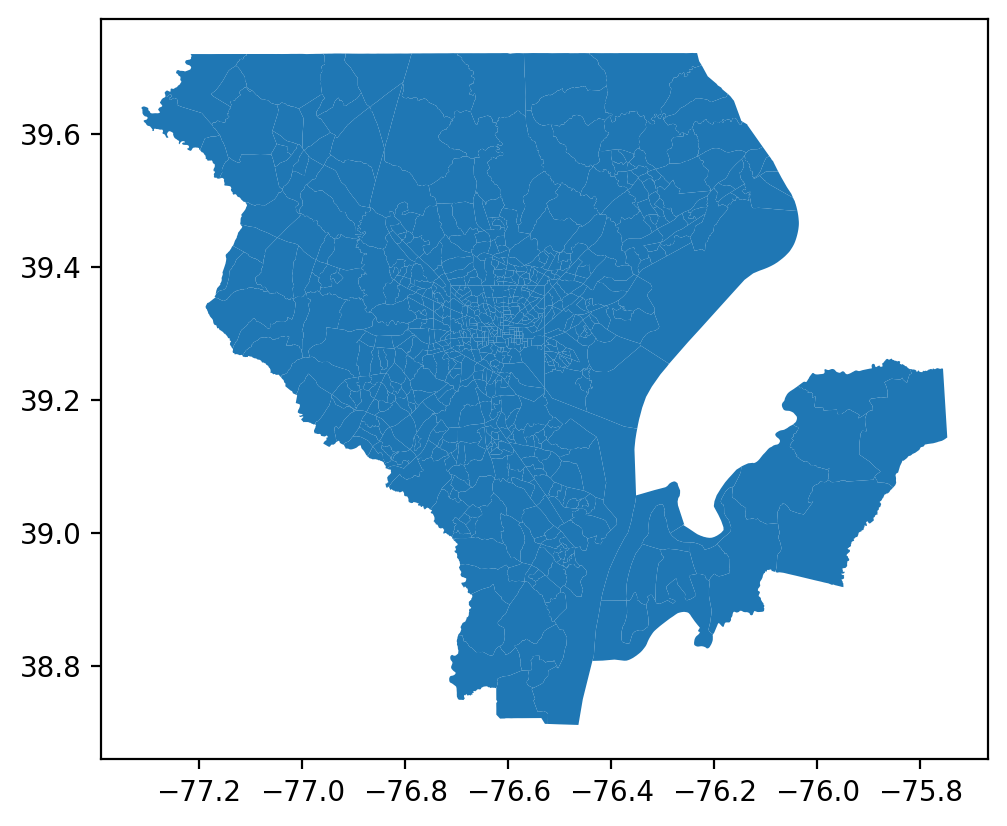

In [20]:
balt.plot()

In [21]:
balt.p_poverty_rate

0       2.074109
1      19.256178
2       5.142332
3       3.562818
4       3.203015
         ...    
712    19.483568
713     9.641694
714    22.825186
715    53.123387
716    54.981914
Name: p_poverty_rate, Length: 717, dtype: float64

In [29]:
balt.median_contract_rent

0          NaN
1       1125.0
2       1694.0
3       1584.0
4          NaN
         ...  
1987     233.0
1988     235.0
1989     273.0
1990       NaN
1991     241.0
Name: median_contract_rent, Length: 1992, dtype: float64

In [31]:
balt.p_female_headed_families

0        0.000000
1        0.000000
2        0.000000
3       15.584416
4        9.926471
          ...    
1987     0.000000
1988     0.000000
1989    60.515021
1990    40.613027
1991     0.000000
Name: p_female_headed_families, Length: 1992, dtype: float64

In [35]:
gio.get_nces?

Signature: gio.get_nces(datastore, years='1516', dataset='sabs')
Docstring:
Extract a subset of data from the National Center for Educational Statistics as a long-form geodataframe.

Parameters
----------
datastore : geosnap.DataStore
    an instantiated DataStore object
years : str, optional
    set of academic years to return formatted as a 4-digit string representing the two years
    from a single period of the academic calendar. For example, the 2015-2016 academic year
    is represented as "1516". Defaults to "1516"
dataset : str, optional
    which NCES dataset to query. Options include `sabs`, `districts`, or `schools`
    Defaults to 'sabs'

Returns
-------
geopandas.GeoDataFrame
    long-form geodataframe with 'year' column representing each time period
File:      ~/mambaforge/envs/urban_analysis/lib/python3.10/site-packages/geosnap/io/constructors.py
Type:      function

In [38]:
sabs = gio.get_nces(datasets)

In [40]:
sabs = sabs[sabs.intersects(balt.to_crs(sabs.crs).unary_union)]

<AxesSubplot:>

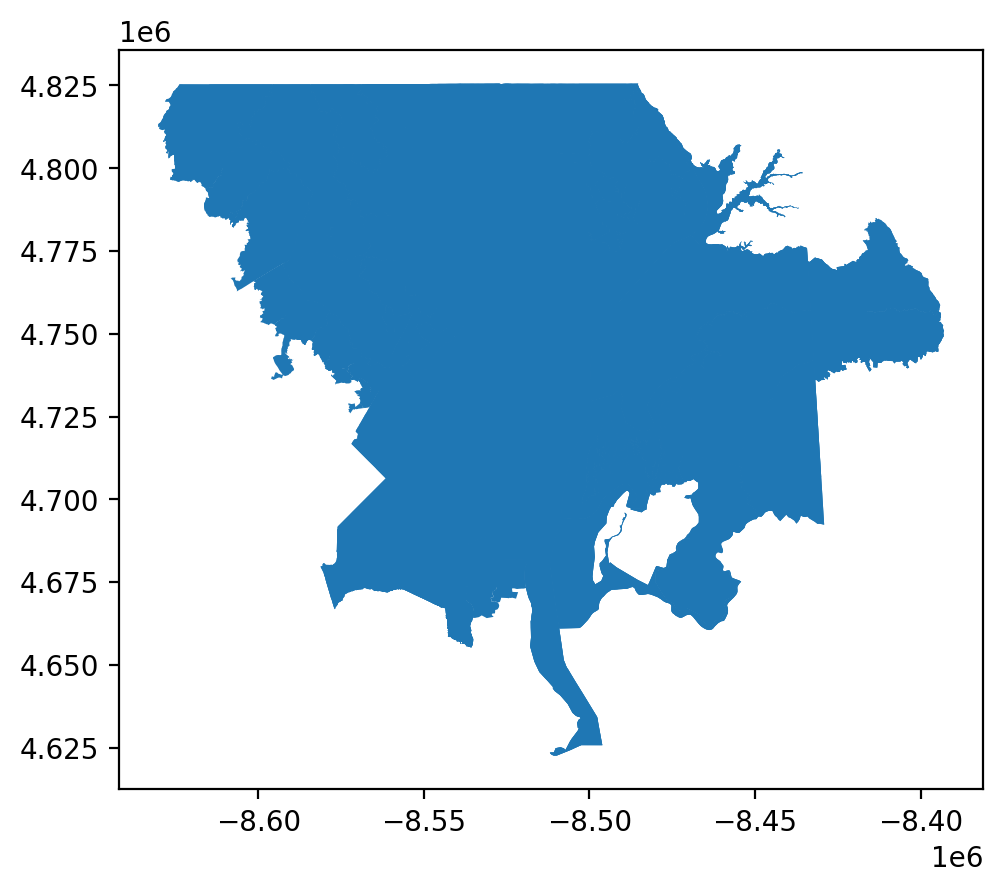

In [41]:
sabs.plot()

In [42]:
seda = gio.get_seda(accept_eula=True)

AttributeError: module 'geosnap.io' has no attribute 'get_seda'

In [43]:
seda = datasets.seda(accept_eula=True)

/Users/knaaptime/mambaforge/envs/urban_analysis/lib/python3.10/site-packages/geosnap/_data.py:204: UserWarning: Streaming data from SEDA archive at <https://exhibits.stanford.edu/data/catalog/db586ns4974>.
Use `geosnap.io.store_seda()` to store the data locally for better performance
  warn(msg)


In [44]:
seda

sedasch                    sedaschname fips stateabb subcat  \
0      010000201667                          Camps    1       AL    all   
1      010000201670                        Det Ctr    1       AL    all   
2      010000201705  Wallace Sch - Mt Meigs Campus    1       AL    all   
3      010000201706      McNeel Sch - Vacca Campus    1       AL    all   
4      010000500870      Albertville Middle School    1       AL    all   
...             ...                            ...  ...      ...    ...   
82483  729999200586              TOMAS ALBA EDISON   72       PR    all   
82484  729999200776     CENTRO VOCACIONAL ESPECIAL   72       PR    all   
82485  729999201270           TOMAS CARRION MADURO   72       PR    all   
82486  729999201511                 JOSE M. TORRES   72       PR    all   
82487  729999202037                VICTOR ROJAS  1   72       PR    all   

      subgroup  gradecenter  gap  tot_asmts  cellcount  ...  gcs_mn_grd_ol_se  \
0          all          7.5    0         13          2  ...               NaN   
1          all          7.5    0          2          1  ...               NaN   
2          all          7.0    0         98         12  ...               NaN   
3          all          7.0    0        118         12  ...               NaN   
4          all          7.5    0      12520         39  ...               NaN   
...        ...          ...  ...        ...        ...  ...               ...   
82483      all          5.0    0         36          3  ...               NaN   
82484      all          7.0    0         20          7  ...               NaN   
82485      all          5.5    0        140         27  ...               NaN   
82486      all          5.5    0       1505         48  ...               NaN   
82487      all          7.0    0         79         11  ...               NaN   

       gcs_mn_mth_ol_se  gcs_mn_avg_eb  gcs_mn_coh_eb  gcs_mn_grd_eb  \
0                   NaN            NaN            NaN            NaN   
1                   NaN            NaN            NaN            NaN   
2                   NaN            NaN            NaN            NaN   
3                   NaN       2.617151            NaN            NaN   
4              0.165719       6.363170      -0.026773            NaN   
...                 ...            ...            ...            ...   
82483               NaN            NaN            NaN            NaN   
82484               NaN            NaN            NaN            NaN   
82485               NaN            NaN            NaN            NaN   
82486               NaN            NaN            NaN            NaN   
82487               NaN            NaN            NaN            NaN   

       gcs_mn_mth_eb  gcs_mn_avg_eb_se  gcs_mn_coh_eb_se  gcs_mn_grd_eb_se  \
0                NaN               NaN               NaN               NaN   
1                NaN               NaN               NaN               NaN   
2                NaN               NaN               NaN               NaN   
3                NaN          0.470695               NaN               NaN   
4          -0.257613          0.082774          0.027471               NaN   
...              ...               ...               ...               ...   
82483            NaN               NaN               NaN               NaN   
82484            NaN               NaN               NaN               NaN   
82485            NaN               NaN               NaN               NaN   
82486            NaN               NaN               NaN               NaN   
82487            NaN               NaN               NaN               NaN   

       gcs_mn_mth_eb_se  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4              0.155704  
...                 ...  
82483               NaN  
82484               NaN  
82485               NaN  
82486               NaN  
82487               NaN  

[82488 rows x 27 column

In [45]:
sabs

SrcName       ncessch                       schnam    leaid gslo  \
13648        CENTRAL  100019000049        Central Middle School  1000190   07   
13649          DOVER  100019000050            Dover High School  1000190   09   
13652         HARTLY  100019000053     Hartly Elementary School  1000190   PK   
13656  WILLIAM HENRY  100019000058  William Henry Middle School  1000190   05   
13783         SMYRNA  100162000141         Smyrna Middle School  1001620   06   
...              ...           ...                          ...      ...  ...   
30984           None  240063001242                  Easton High  2400630   09   
30985           None  240063001243                Easton Middle  2400630   06   
30991   Not provided  240063099991                   Unassigned  2400630   KG   
30992   Not provided  240063099992                   Unassigned  2400630   06   
30993   Not provided  240063099993                   Unassigned  2400630   09   

      gshi defacto stAbbrev openEnroll     Shape_Leng    Shape_Area level  \
13648   08       0       DE          0  175363.725385  5.007095e+08     2   
13649   12       0       DE          0  175363.725385  5.007095e+08     3   
13652   04       0       DE          0   89121.606361  1.590547e+08     1   
13656   06       0       DE          0  175363.725385  5.007095e+08     2   
13783   08       0       DE          0  181685.335949  7.544446e+08     2   
...    ...     ...      ...        ...            ...           ...   ...   
30984   12       0       MD          0  184440.210578  8.073253e+08     3   
30985   08       0       MD          0  184440.210578  8.073253e+08     2   
30991   05       0       MD          0  400134.693015  6.383886e+08     1   
30992   08       0       MD          0  400134.693015  6.383886e+08     2   
30993   12       0       MD          0  400134.693015  6.383886e+08     3   

      MultiBdy                                           geometry  year  
13648        0  POLYGON ((-8407593.100 4757523.450, -8407558.1...  1516  
13649        0  POLYGON ((-8407593.100 4757523.450, -8407558.1...  1516  
13652        0  POLYGON ((-8417807.811 4750035.861, -8417830.7...  1516  
13656        0  POLYGON ((-8407593.100 4757523.450, -8407558.1...  1516  
13783        0  POLYGON ((-8413012.559 4784548.843, -8413007.5...  1516  
...        ...                                                ...   ...  
30984        0  POLYGON ((-8467148.930 4703358.544, -8467132.3...  1516  
30985        0  POLYGON ((-8467148.930 4703358.544, -8467132.3...  1516  
30991        0  POLYGON ((-8470595.787 4705531.321, -8470628.8...  1516  
30992        0  POLYGON ((-8470595.787 4705531.321, -8470628.8...  1516  
30993        0  POLYGON ((-8470595.787 4705531.321, -8470628.8...  1516  

[682 rows x 15 columns]

In [46]:
sabs = sabs.merge(seda, left_on='ncessch', right_on='sedasch')

In [48]:
sabs.columns

Index(['SrcName', 'ncessch', 'schnam', 'leaid', 'gslo', 'gshi', 'defacto',
       'stAbbrev', 'openEnroll', 'Shape_Leng', 'Shape_Area', 'level',
       'MultiBdy', 'geometry', 'year', 'sedasch', 'sedaschname', 'fips',
       'stateabb', 'subcat', 'subgroup', 'gradecenter', 'gap', 'tot_asmts',
       'cellcount', 'mn_asmts', 'gcs_mn_avg_ol', 'gcs_mn_coh_ol',
       'gcs_mn_grd_ol', 'gcs_mn_mth_ol', 'gcs_mn_avg_ol_se',
       'gcs_mn_coh_ol_se', 'gcs_mn_grd_ol_se', 'gcs_mn_mth_ol_se',
       'gcs_mn_avg_eb', 'gcs_mn_coh_eb', 'gcs_mn_grd_eb', 'gcs_mn_mth_eb',
       'gcs_mn_avg_eb_se', 'gcs_mn_coh_eb_se', 'gcs_mn_grd_eb_se',
       'gcs_mn_mth_eb_se'],
      dtype='object')